<a href="https://www.kaggle.com/code/mazensafty/titanic-prediction?scriptVersionId=197900850" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Ttitanic Prediction Model

### Problem Definition
* Predict surviving of person
* Get insights why not survived?

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Data Understanding

In [2]:
titanic_data = pd.read_csv("/kaggle/input/titanic/train.csv")

titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


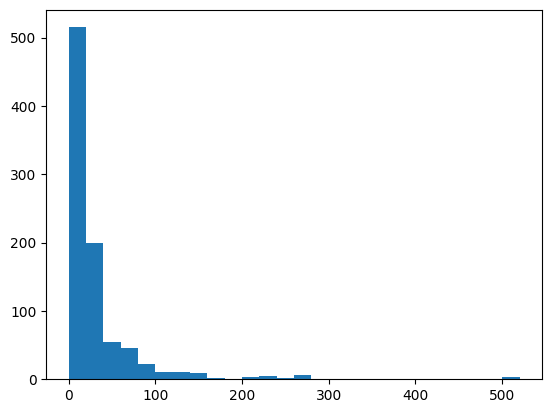

In [5]:
bins = np.arange(0 , titanic_data["Fare"].max() + 20 , 20)
plt.hist(data = titanic_data , x = "Fare" , bins = bins);

In [6]:
titanic_data["Fare"].skew()

4.787316519674893

In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning and Preprocessing

### Check For Duplicates


In [8]:
titanic_data.duplicated().sum()

0

### Handle Missing Data

In [9]:
missing = titanic_data.isnull().sum()
print(missing , "\n")

total_cells = np.product(titanic_data.shape)
total_missing = missing.sum()

missing_percent = (total_missing / total_cells) * 100
print(missing_percent , "%" , sep = '')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

8.099513655069211%


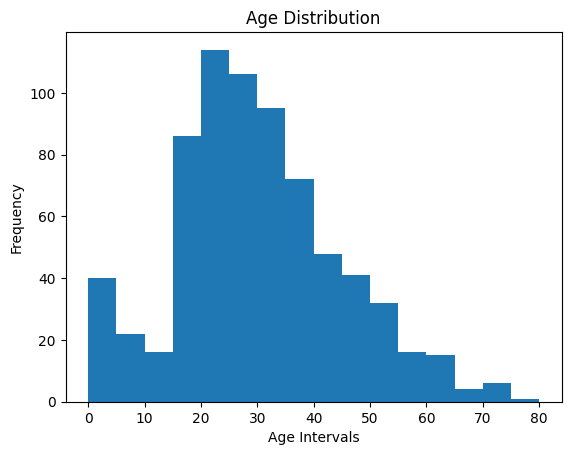

In [10]:
bins = np.arange(0 , titanic_data["Age"].max() + 5 , 5)
plt.hist(data = titanic_data , x = "Age" , bins = bins)
plt.title('Age Distribution')
plt.xlabel('Age Intervals')
plt.ylabel('Frequency');

#### The age is normaly distribuated so filling the null values with mean is the best way

In [11]:
mean_age = titanic_data["Age"].mean()

titanic_data["Age"] = titanic_data["Age"].fillna(mean_age)
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Drop cabin cloumn because the null values is more than 50% of data in that column 

In [12]:
titanic_data = titanic_data.drop(columns = "Cabin" , axis = 1) 
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#### we droped ebarked column because titanic is sank after crossing all three distination so its not important feature

In [13]:
titanic_data.drop(columns = ["Embarked"] , axis = 1 , inplace = True)
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

### Handling Outliers

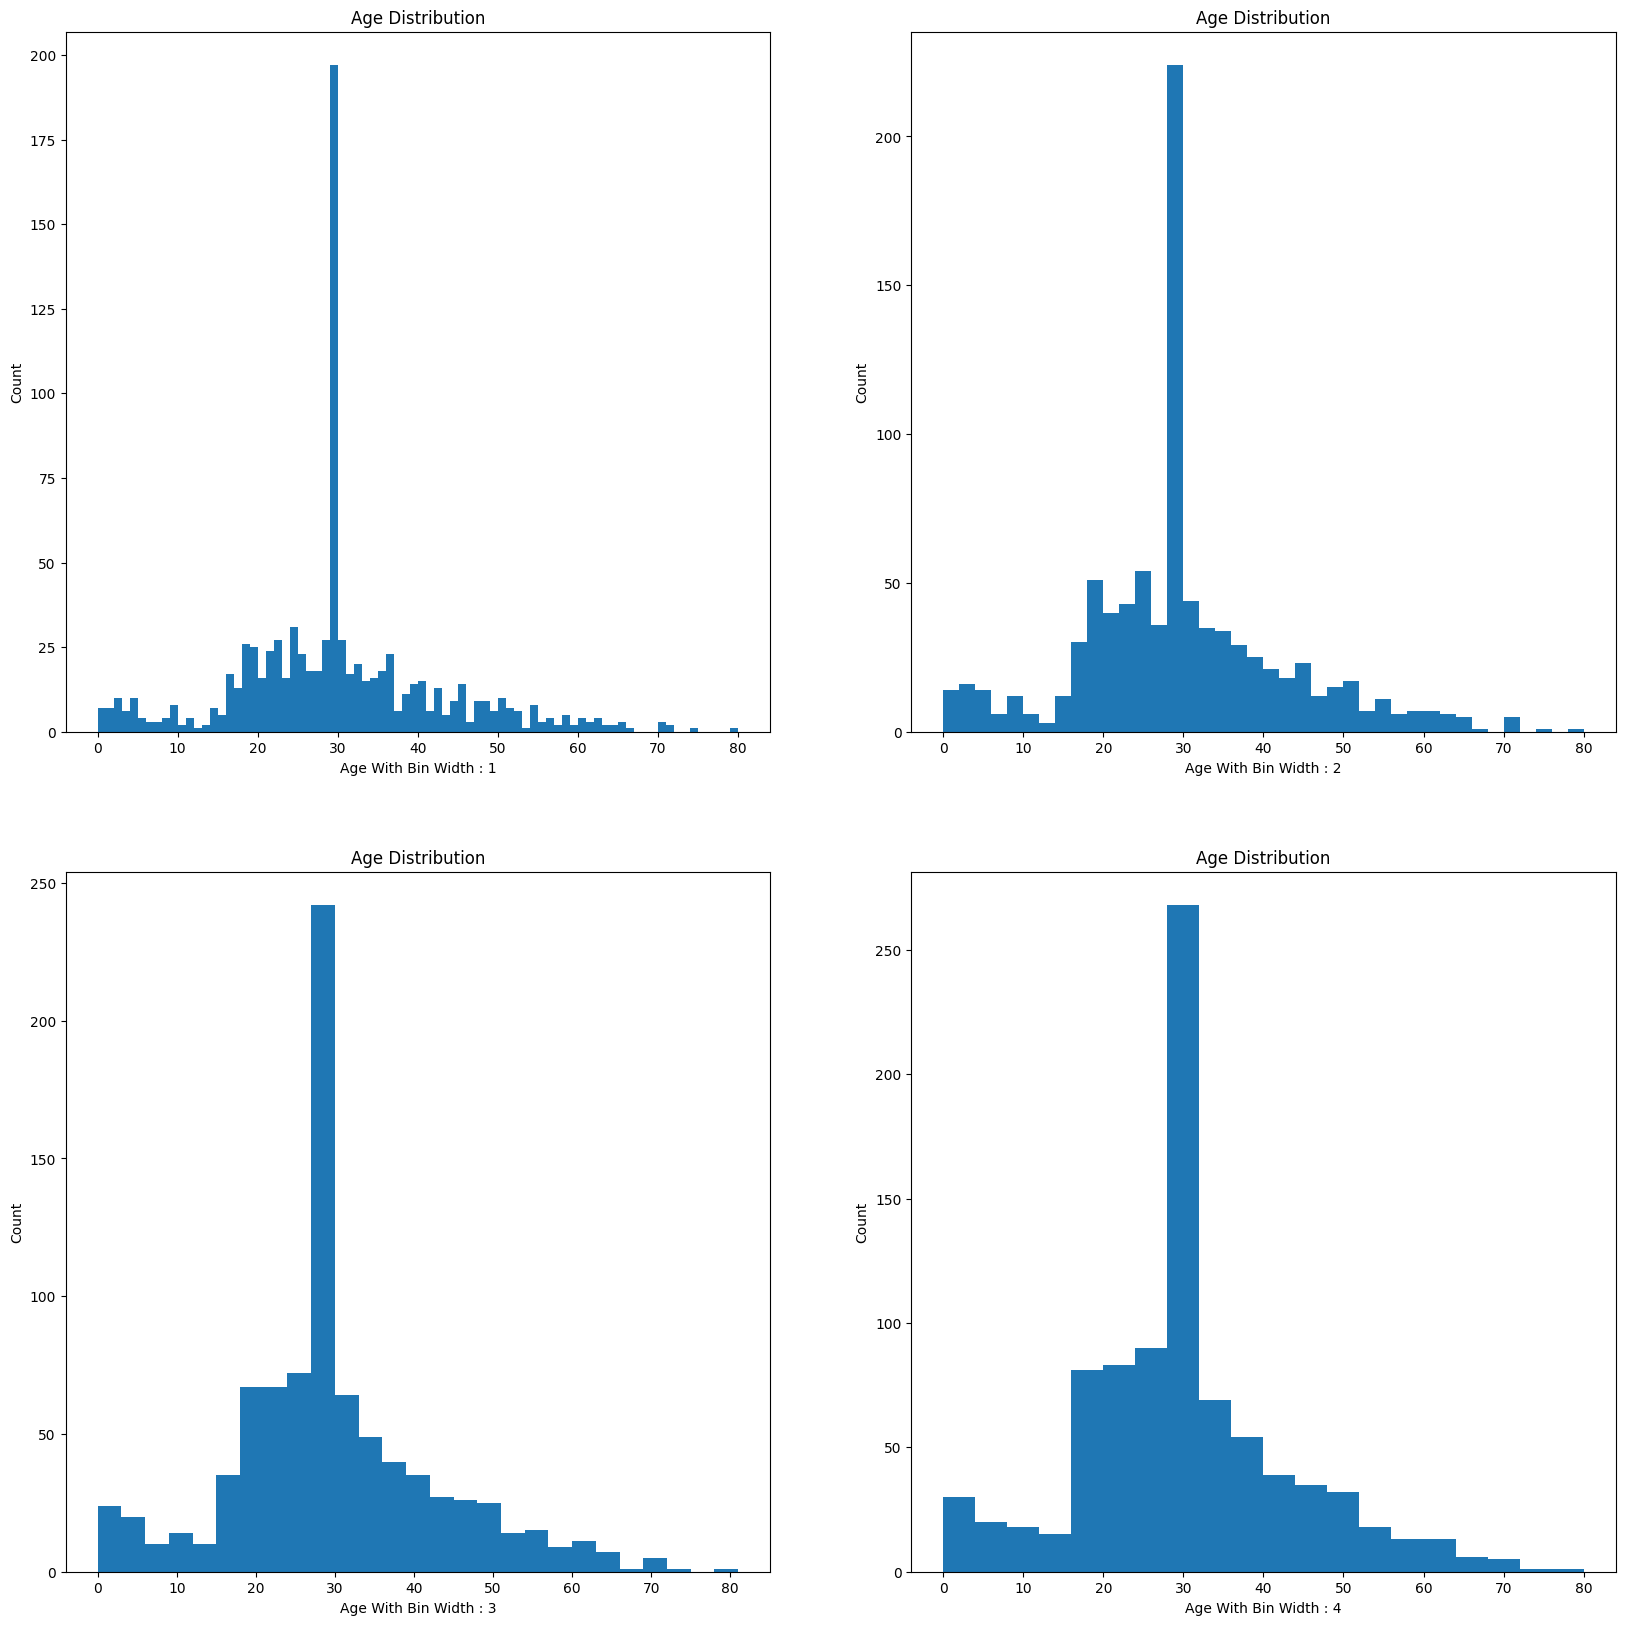

In [14]:
plt.figure(figsize = [20,20])

for i in range(4):
    plt.subplot(2 , 2 , i + 1)
    bins = np.arange(0 , titanic_data["Age"].max() + 1 + i , 1 + i)
    plt.hist(data = titanic_data , x = "Age" , bins = bins)
    plt.title("Age Distribution")
    plt.xlabel("Age With Bin Width : " + str(1 + i))
    plt.ylabel("Count");

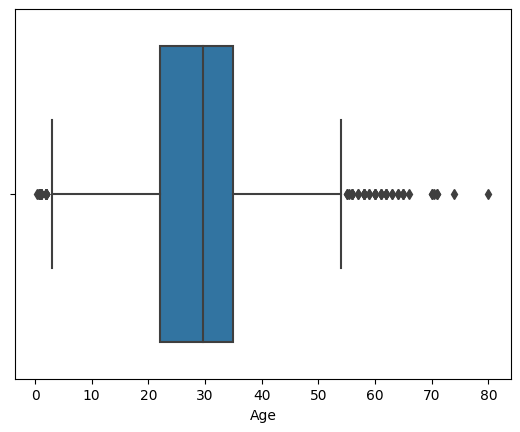

In [15]:
sns.boxplot(x = titanic_data["Age"]);

In [16]:
out_index = titanic_data[titanic_data["Age"] >= 70].index
titanic_data = titanic_data.drop(index = out_index , axis = 0)
titanic_data["Age"].describe()

count    884.000000
mean      29.361328
std       12.480493
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       66.000000
Name: Age, dtype: float64

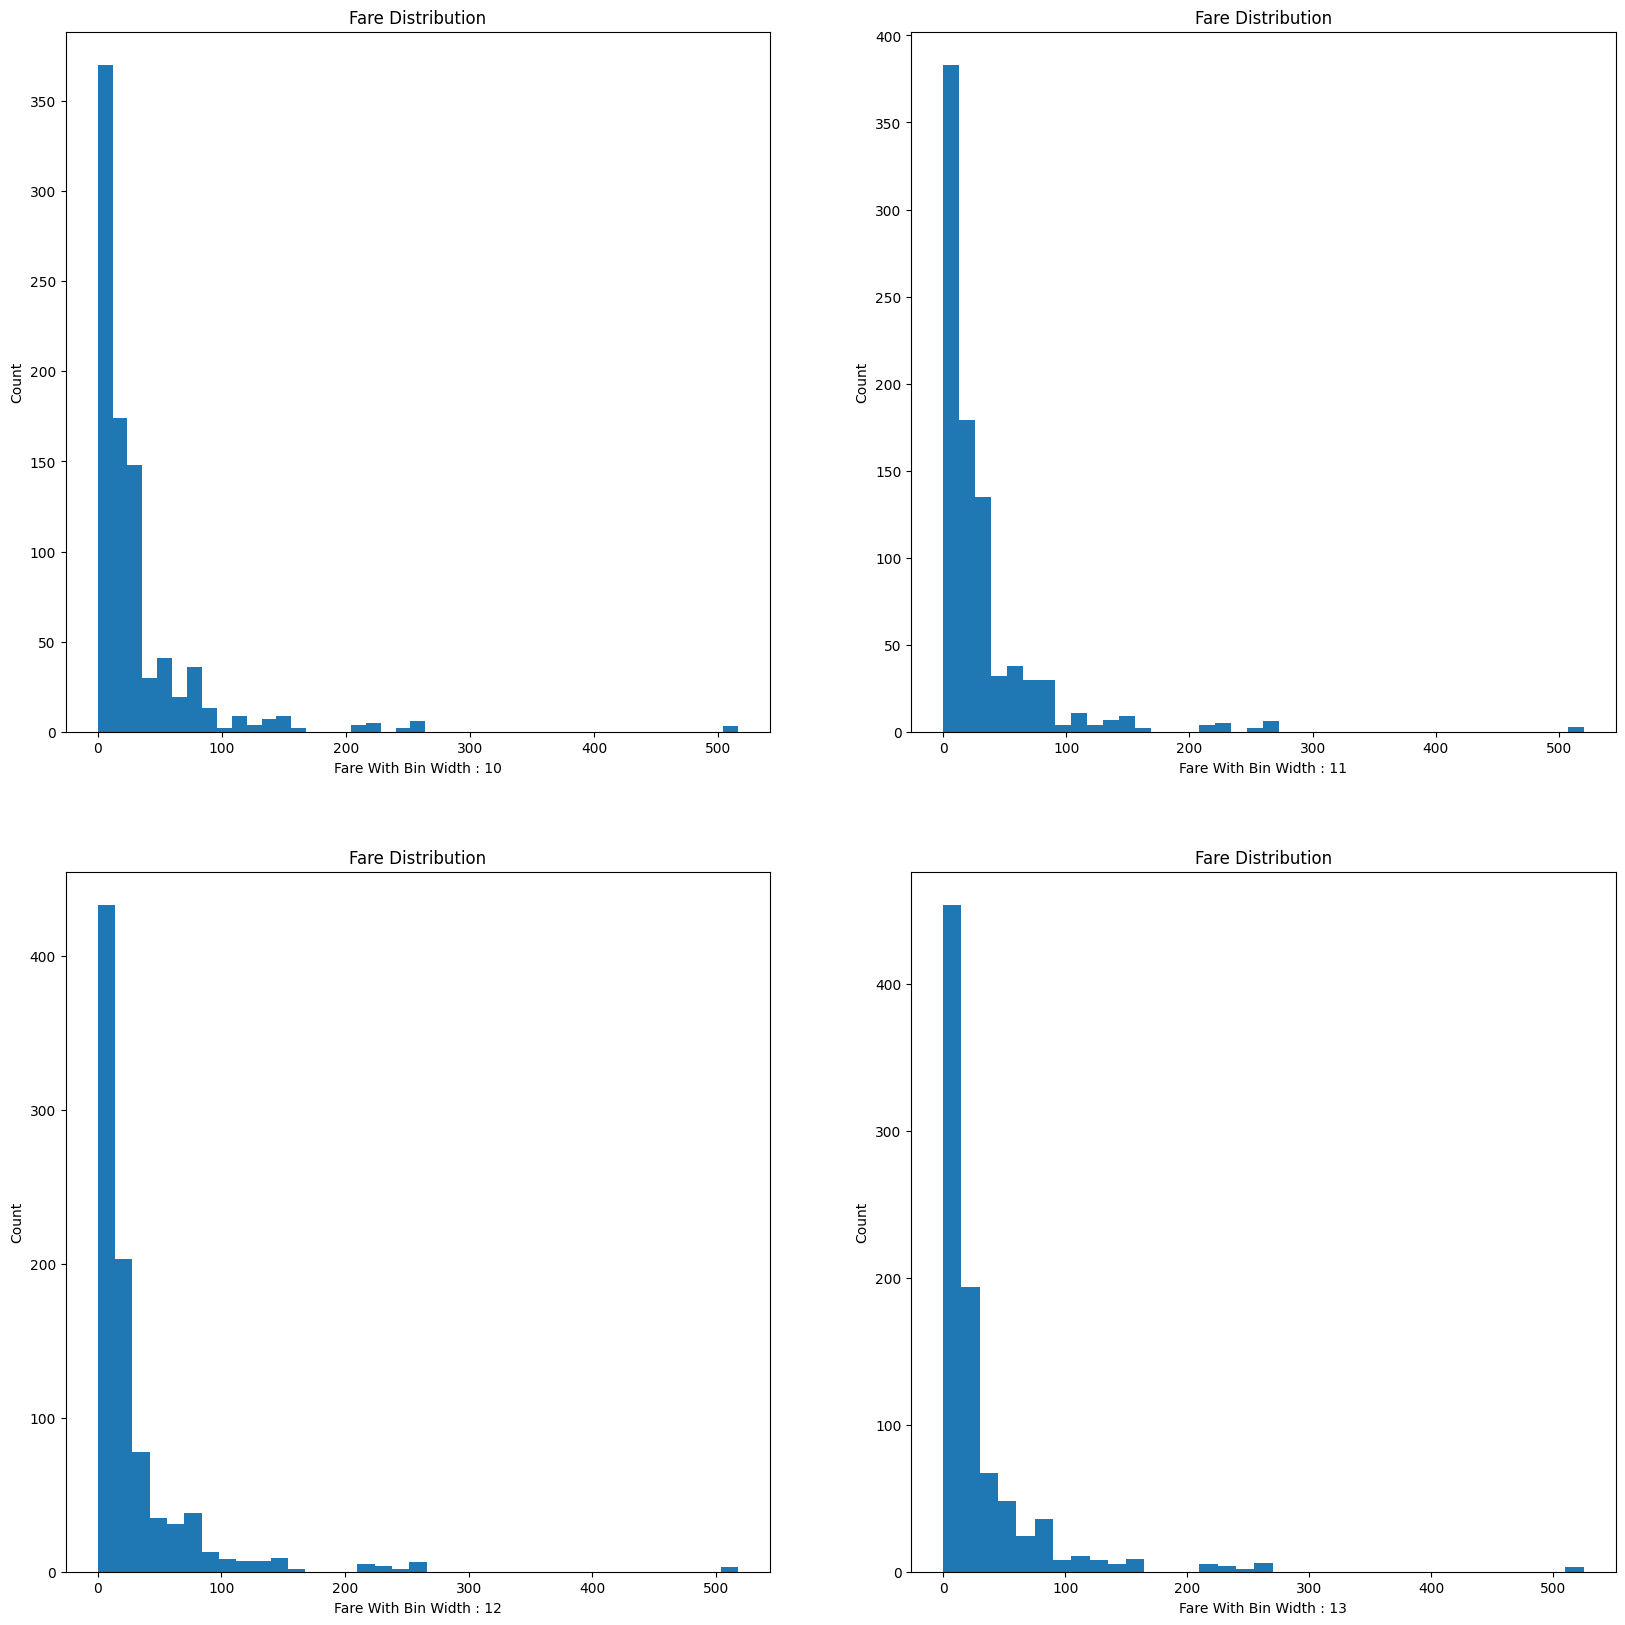

In [17]:
plt.figure(figsize = [20,20])

for i in range(4):
    plt.subplot(2 , 2 , i + 1)
    bins = np.arange(0 , titanic_data["Fare"].max() + 12 + i , 12 + i)
    plt.hist(data = titanic_data , x = "Fare" , bins = bins)
    plt.title("Fare Distribution")
    plt.xlabel("Fare With Bin Width : " + str(i + 10))
    plt.ylabel("Count");

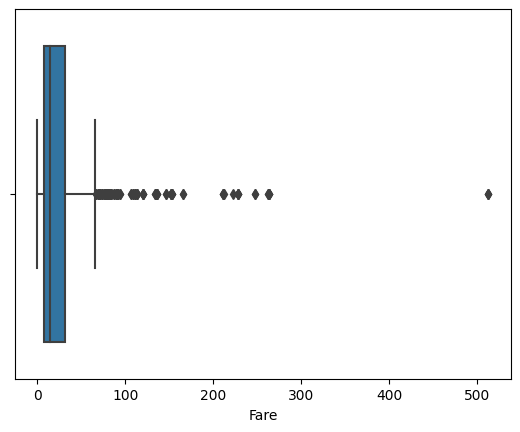

In [18]:
sns.boxplot(x = titanic_data["Fare"]);

In [19]:
out_index = titanic_data[titanic_data["Fare"] >= 200].index
titanic_data = titanic_data.drop(index = out_index , axis = 0)
titanic_data["Fare"].describe()

count    864.000000
mean      26.500689
std       29.400192
min        0.000000
25%        7.895800
50%       13.860400
75%       29.775000
max      164.866700
Name: Fare, dtype: float64

# Data Analysis

In [20]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708


##### How many males and females ?

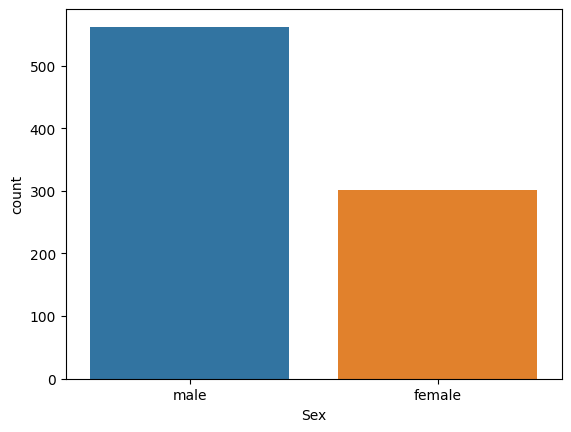

In [21]:
sns.countplot(data = titanic_data , x = "Sex");

##### How many survivors ?


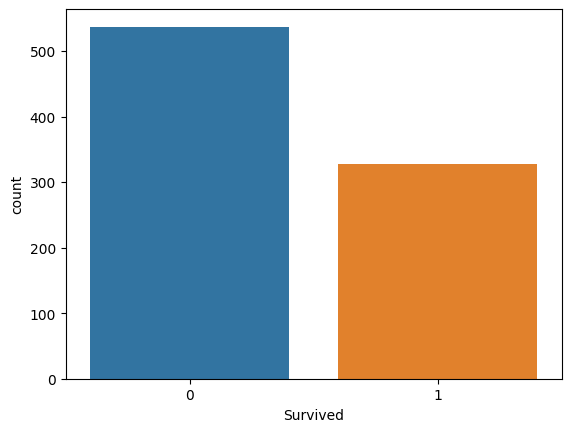

In [22]:
sns.countplot(data = titanic_data , x = "Survived");

##### How many survivors in each male and female ?

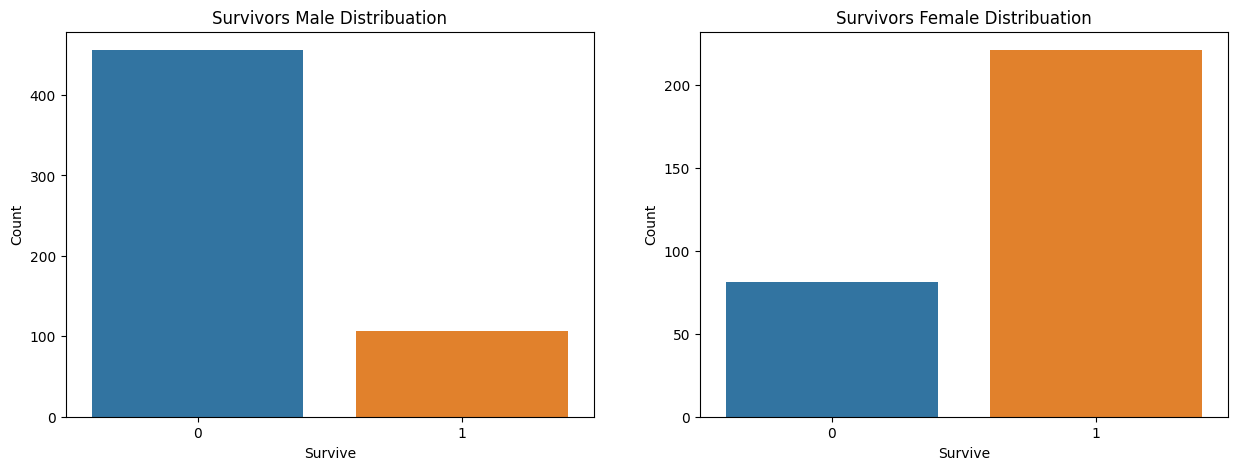

In [23]:
male_data = titanic_data[titanic_data["Sex"] == "male"]
female_data = titanic_data[titanic_data["Sex"] == "female"]
plt.figure(figsize = [15,5])

plt.subplot(1 , 2 , 1)
sns.countplot(data = male_data , x = "Survived")
plt.title("Survivors Male Distribuation")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 2 , 2)
sns.countplot(data = female_data , x = "Survived")
plt.title("Survivors Female Distribuation")
plt.xlabel("Survive")
plt.ylabel("Count");

##### male survivors ?

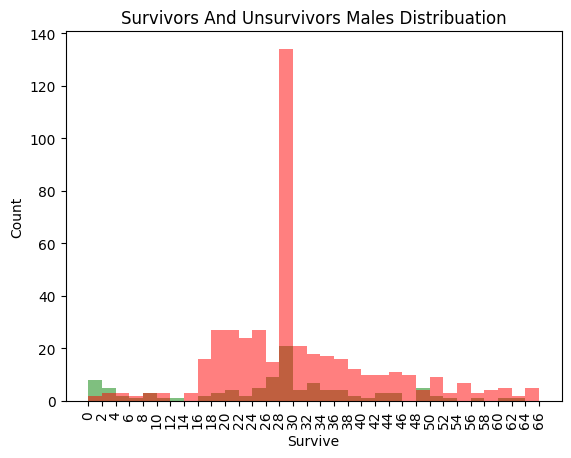

In [24]:
survived_male = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Survived"] == 1)]
unsurvived_male = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Survived"] == 0)]

bins = np.arange(0 , titanic_data["Age"].max() + 2 , 2)
plt.hist(data = survived_male , x = "Age" , bins = bins , color = "green" , alpha=0.5)
plt.hist(data = unsurvived_male , x = "Age" , bins = bins , color = "red" , alpha=0.5)
plt.title("Survivors And Unsurvivors Males Distribuation")
plt.xlabel("Survive")
plt.ylabel("Count")
plt.xticks(bins , rotation = 90);

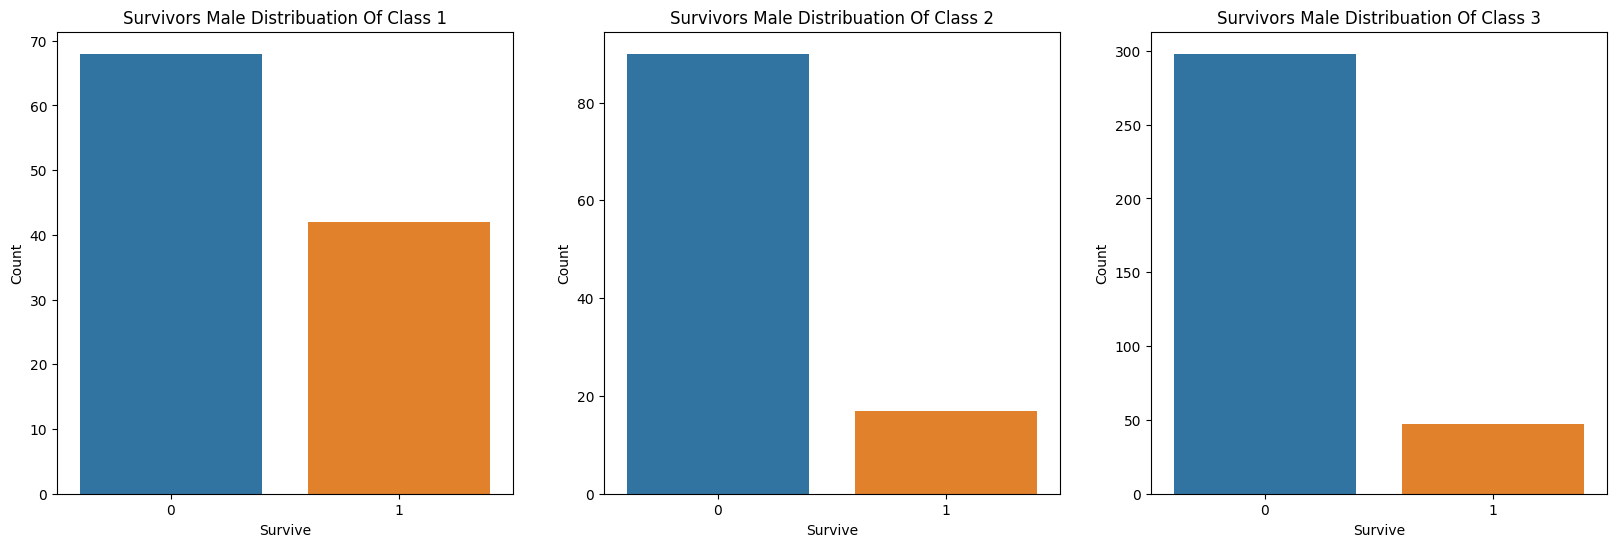

In [25]:
men_survivors_1 = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Pclass"] == 1)]
men_survivors_2 = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Pclass"] == 2)]
men_survivors_3 = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Pclass"] == 3)]

plt.figure(figsize = [20,6])

plt.subplot(1 , 3 , 1)
sns.countplot(data = men_survivors_1 , x = "Survived")
plt.title("Survivors Male Distribuation Of Class 1")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 3 , 2)
sns.countplot(data = men_survivors_2 , x = "Survived")
plt.title("Survivors Male Distribuation Of Class 2")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 3 , 3)
sns.countplot(data = men_survivors_3 , x = "Survived")
plt.title("Survivors Male Distribuation Of Class 3")
plt.xlabel("Survive")
plt.ylabel("Count");

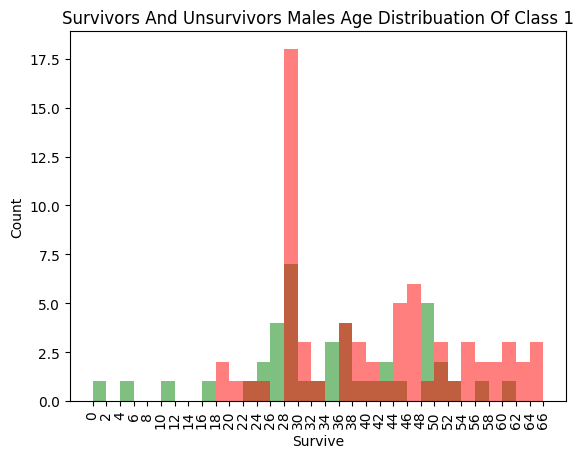

In [26]:
survived_1 = men_survivors_1[men_survivors_1['Survived'] == 1]
not_survived_1 = men_survivors_1[men_survivors_1['Survived'] == 0]

bins = np.arange(0 , titanic_data["Age"].max() + 2 , 2)
plt.hist(data = survived_1 , x = "Age" , bins = bins , color = "green" , alpha=0.5)
plt.hist(data = not_survived_1 , x = "Age" , bins = bins , color = "red" , alpha=0.5)
plt.title("Survivors And Unsurvivors Males Age Distribuation Of Class 1")
plt.xlabel("Survive")
plt.ylabel("Count")
plt.xticks(bins , rotation = 90);

##### Female survivors ?

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


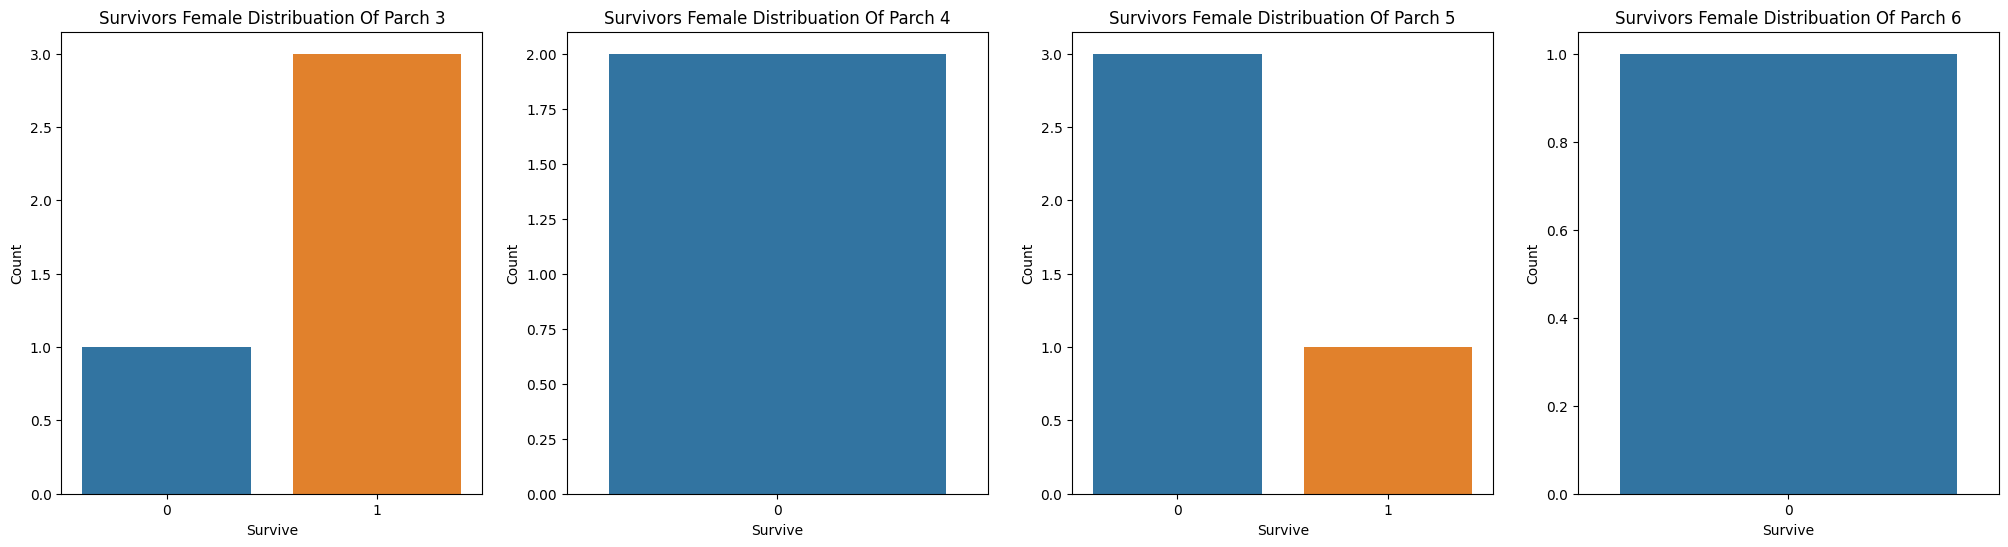

In [27]:
female_survivors_3 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Parch"] == 3)]
female_survivors_4 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Parch"] == 4)]
female_survivors_5 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Parch"] == 5)]
female_survivors_6 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Parch"] == 6)]

plt.figure(figsize = [25,6])

plt.subplot(1 , 4 , 1)
sns.countplot(data = female_survivors_3 , x = "Survived")
plt.title("Survivors Female Distribuation Of Parch 3")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 4 , 2)
sns.countplot(data = female_survivors_4 , x = "Survived")
plt.title("Survivors Female Distribuation Of Parch 4")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 4 , 3)
sns.countplot(data = female_survivors_5 , x = "Survived")
plt.title("Survivors Female Distribuation Of Parch 5")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 4 , 4)
sns.countplot(data = female_survivors_6 , x = "Survived")
plt.title("Survivors Female Distribuation Of Parch 6")
plt.xlabel("Survive")
plt.ylabel("Count");

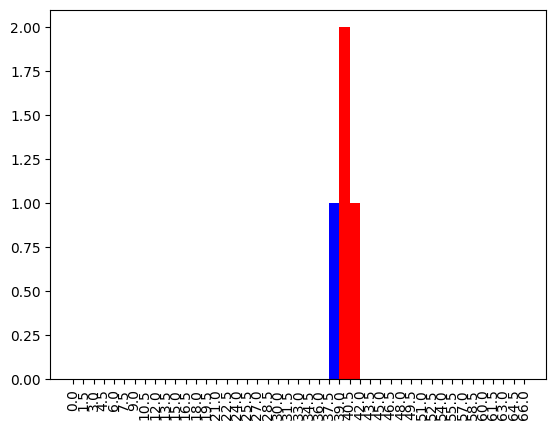

In [28]:
sur_female_parch5 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Survived"] == 1) & (titanic_data["Parch"] == 5)]
unsur_female_parch5 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Survived"] == 0) & (titanic_data["Parch"] == 5)]

bins = np.arange(0 , titanic_data["Age"].max() + 1.5 , 1.5)
plt.hist(data = sur_female_parch5 , x = "Age" , bins = bins , color = "blue")
plt.hist(data = unsur_female_parch5 , x = "Age" , bins = bins , color = "red")
plt.xticks(rotation = 90)
plt.xticks(bins);

# Prepare Data For ML

## Skweed Data

In [29]:
numeric_data = titanic_data[["Fare" , "Age"]]
numeric_data

,Fare,Age
0,7.2500,22.000000
1,71.2833,38.000000
2,7.9250,26.000000
3,53.1000,35.000000
4,8.0500,35.000000
...,...,...
886,13.0000,27.000000
887,30.0000,19.000000
888,23.4500,29.699118
889,30.0000,26.000000


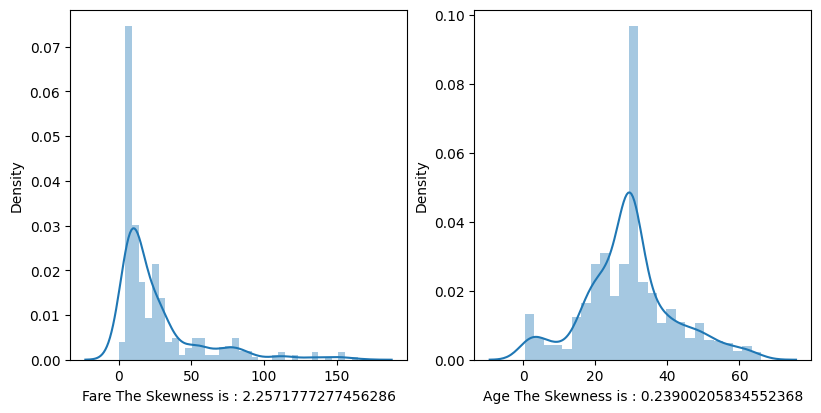

In [30]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = [20 , 10])

for i in range(len(numeric_data.columns)):
    plt.subplot(2 , 4 , i + 1)
    sns.distplot(numeric_data[numeric_data.columns[i]])
    skewness = numeric_data[numeric_data.columns[i]].skew()
    plt.xlabel(numeric_data.columns[i] + " The Skewness is : " + str(skewness));

In [31]:
high_skew = []
for i in range(len(numeric_data.columns)):
    if abs(numeric_data[numeric_data.columns[i]].skew()) > 1:
        high_skew.append(numeric_data.columns[i])
high_skew

['Fare']

In [32]:
for i in range(len(high_skew)):
    titanic_data[high_skew[i]] = np.log1p(titanic_data[high_skew[i]])

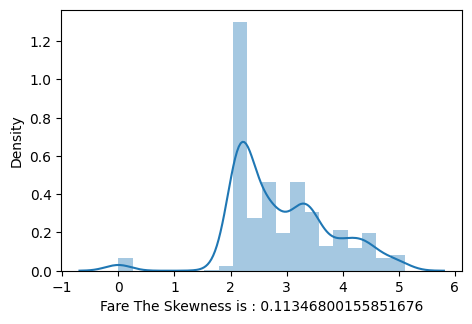

In [33]:
plt.figure(figsize = [30 , 40])

for i in range(len(high_skew)):
    plt.subplot(10 , 5 , i + 1)
    sns.distplot(titanic_data[high_skew[i]])
    skewness = titanic_data[high_skew[i]].skew()
    plt.xlabel(high_skew[i] + " The Skewness is : " + str(skewness));

## Feature Scaling

In [34]:
scaler_features = StandardScaler()
titanic_data[numeric_data.columns] = scaler_features.fit_transform(titanic_data[numeric_data.columns])

#### Encoding Categorical Variables

In [35]:
le = LabelEncoder()
titanic_data["Sex"] = le.fit_transform(titanic_data["Sex"])
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.586622,1,0,A/5 21171,-0.885021
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.695098,1,0,PC 17599,1.547068
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.266192,0,0,STON/O2. 3101282,-0.796895
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.454776,1,0,113803,1.222370
4,5,0,3,"Allen, Mr. William Henry",1,0.454776,0,0,373450,-0.781310
5,6,0,3,"Moran, Mr. James",1,0.030135,0,0,330877,-0.731861
6,7,0,1,"McCarthy, Mr. Timothy J",1,1.976819,0,0,17463,1.196439
7,8,0,3,"Palsson, Master. Gosta Leonard",1,-2.188773,3,1,349909,0.217892
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,-0.186085,0,2,347742,-0.452767
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,-1.227483,1,0,237736,0.600933


## Feature Selection

In [36]:
titanic_data = titanic_data.drop(columns = ["PassengerId" , "Name" , "Ticket"])
titanic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,-0.586622,1,0,-0.885021
1,1,1,0,0.695098,1,0,1.547068
2,1,3,0,-0.266192,0,0,-0.796895
3,1,1,0,0.454776,1,0,1.222370
4,0,3,1,0.454776,0,0,-0.781310
5,0,3,1,0.030135,0,0,-0.731861
6,0,1,1,1.976819,0,0,1.196439
7,0,3,1,-2.188773,3,1,0.217892
8,1,3,0,-0.186085,0,2,-0.452767
9,1,2,0,-1.227483,1,0,0.600933


In [37]:
y = titanic_data["Survived"]
X = titanic_data.drop(["Survived"] , axis = 1)

print(y)
X.head()

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 864, dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,-0.586622,1,0,-0.885021
1,1,0,0.695098,1,0,1.547068
2,3,0,-0.266192,0,0,-0.796895
3,1,0,0.454776,1,0,1.222370
4,3,1,0.454776,0,0,-0.781310


In [38]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)

# Build The Model

## Preformance Metrics

In [39]:
from sklearn.metrics import accuracy_score

def performance(y_true , y_predict):
    score = accuracy_score(y_true , y_predict)
    
    return score

## Learning Curves

In [40]:
from sklearn.model_selection import learning_curve 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import ShuffleSplit, train_test_split

def draw_learning_curves(X, y, estimator, num_trainings):
    cv1 = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv1, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings),scoring = 'r2')
    
    print("train size :\n",train_sizes)
    print()
    print(train_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    print("train score mean:\n",train_scores_mean)
    print()
    #train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    #test_scores_std = np.std(test_scores, axis=1)

    plt.grid();

    plt.title("Learning Curves");
    plt.xlabel("Training examples");
    plt.ylabel("Score");

    plt.plot(train_sizes,train_scores_mean, 'o-', color="g",
             label="Training score");
    plt.plot(train_sizes,test_scores_mean, 'o-', color="y",
             label="Cross-validation score");
    plt.legend(loc="best");

train size :
 [ 69 138 207 276 345 414 483 552 621 691]

[[ 0.00929054 -0.03439153 -0.1344294   0.13595707  0.18454545 -0.0112069
   0.04827586  0.31       -0.02222222 -0.08611111]
 [ 0.00424448  0.07423971 -0.06769826  0.14228635  0.12181818  0.10775862
  -0.00396825  0.12914131  0.07361111  0.16109422]
 [ 0.07095111  0.15652952 -0.08134328  0.13595707  0.04166667 -0.00306566
   0.02645503  0.07313433  0.14022943  0.09343066]
 [ 0.07509751  0.11165372  0.00482698  0.08102109  0.12181818  0.08966905
   0.0296105   0.02087816  0.11712217  0.11718523]
 [ 0.02383816  0.12771798  0.01228528  0.0919761   0.0919761   0.13854605
  -0.01005291  0.03624201  0.05909091  0.08353011]
 [ 0.05260827  0.09010989  0.05398755  0.07509881  0.15000122  0.13800705
   0.04017758  0.04091859  0.05123926  0.06890207]
 [ 0.04886906  0.07817726  0.0725601   0.08597403  0.16575855  0.14485475
   0.03250882  0.0524504   0.07622951  0.03220779]
 [ 0.05288267  0.08102109  0.0920925   0.10163309  0.11842752  0.1329

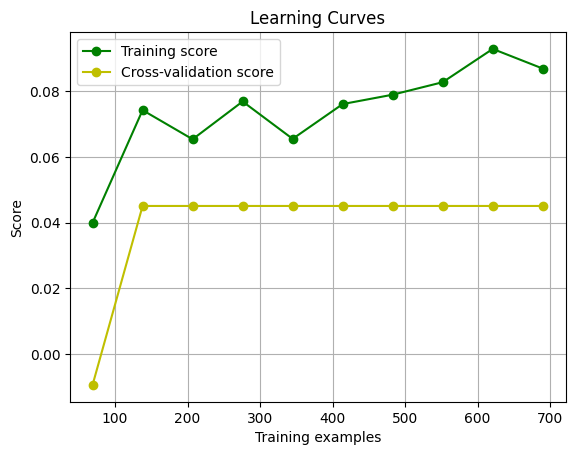

In [41]:
#estimator maxdepth=1
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(max_depth=1,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 69 138 207 276 345 414 483 552 621 691]

[[0.3589527  0.51322751 0.59961315 0.50626118 0.56090909 0.52413793
  0.34568966 0.56090909 0.425      0.48888889]
 [0.15067912 0.50626118 0.19922631 0.32608213 0.40409091 0.37543103
  0.42195767 0.28465179 0.61666667 0.54828151]
 [0.26862108 0.46511628 0.24968017 0.27996422 0.31851852 0.30399525
  0.49294533 0.36002132 0.4882318  0.39562044]
 [0.27220788 0.46392897 0.21349229 0.32608213 0.29431818 0.32110912
  0.4086689  0.22954347 0.38043661 0.37400407]
 [0.18246445 0.41432493 0.28734508 0.31284678 0.31284678 0.33544981
  0.30634921 0.2264574  0.24727273 0.27446133]
 [0.19522638 0.23486513 0.30348534 0.2580463  0.35238188 0.31040564
  0.30566038 0.22856495 0.24717898 0.24877326]
 [0.26701836 0.22742475 0.30442007 0.30103896 0.32916667 0.31937419
  0.30766686 0.24017249 0.26978142 0.22038961]
 [0.2838869  0.23418424 0.29384972 0.27975756 0.31433251 0.29265873
  0.29524665 0.30553559 0.20355161 0.24577417]
 [0.27219654 0.3239271 

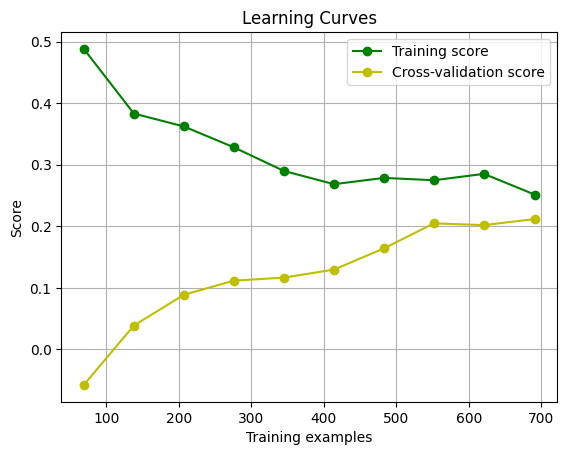

In [42]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(max_depth=3,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 69 138 207 276 345 414 483 552 621 691]

[[0.70861486 0.75661376 0.86653772 0.8765653  0.93727273 1.
  0.76206897 0.93727273 1.         0.68055556]
 [0.58998302 0.81484794 0.63297872 0.57114317 0.84318182 0.64310345
  0.75661376 0.72008114 0.90416667 0.96773439]
 [0.56512605 0.71198569 0.55863539 0.62969589 0.57407407 0.57011472
  0.73633157 0.73518124 0.79529272 0.67622523]
 [0.59061693 0.67835738 0.51846467 0.61709212 0.60795455 0.52169052
  0.69675328 0.53451585 0.75217465 0.55056703]
 [0.47531301 0.65108719 0.58741031 0.61961161 0.59507042 0.53235357
  0.58624339 0.48007792 0.54836364 0.45266381]
 [0.44990157 0.49335664 0.50100442 0.53246753 0.56488158 0.54365079
  0.54051054 0.46833531 0.49468178 0.44980577]
 [0.45026377 0.45568562 0.52736236 0.54298701 0.58717949 0.53752349
  0.51181638 0.45471202 0.5073224  0.38168831]
 [0.44558986 0.42563818 0.48784705 0.47337112 0.51023751 0.52083333
  0.44239295 0.44290217 0.41032186 0.36240703]
 [0.47625359 0.47942387 0.46923

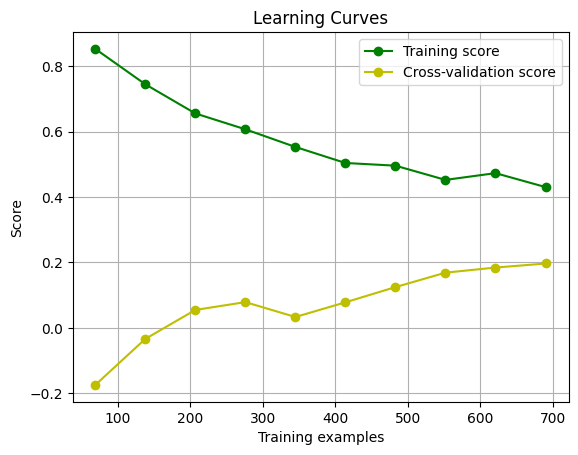

In [43]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(max_depth=6,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 69 138 207 276 345 414 483 552 621 691]

[[0.94172297 1.         0.93326886 1.         1.         1.
  0.94051724 1.         1.         1.        ]
 [0.79499151 1.         0.96663443 0.93873474 0.96863636 1.
  0.93915344 0.93779581 0.96805556 1.        ]
 [0.84186402 0.9177102  0.95586354 0.93828265 0.82962963 0.77482199
  0.89858907 0.95586354 0.89764636 0.97841502]
 [0.80288963 0.86215316 0.90369293 0.95405105 0.87454545 0.84570662
  0.89386365 0.91974411 0.93804366 0.90369293]
 [0.74375752 0.8255436  0.88747554 0.87729407 0.86502347 0.8400157
  0.85396825 0.82246563 0.82436364 0.75815378]
 [0.78607283 0.74150849 0.83366814 0.82721626 0.8482145  0.81746032
  0.7345172  0.83320323 0.71124673 0.7460642 ]
 [0.64223515 0.85953177 0.84839925 0.7938961  0.81939103 0.79057667
  0.77809835 0.81227791 0.73606557 0.65051948]
 [0.66889394 0.77791343 0.75944331 0.70570739 0.76642097 0.7337963
  0.68247376 0.72526683 0.67069922 0.63455037]
 [0.74152774 0.70928865 0.75874126 0.7578

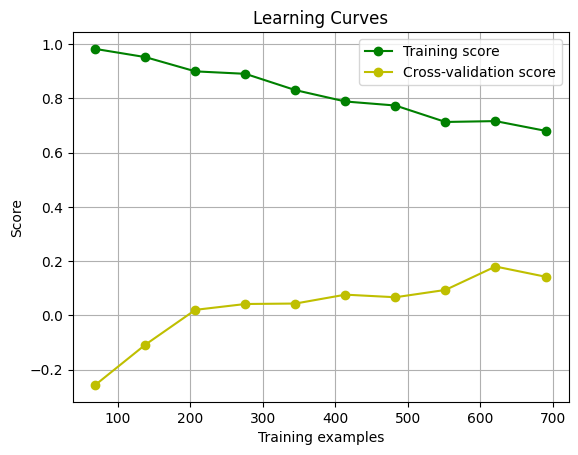

In [44]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(max_depth=10,random_state=0)
draw_learning_curves(X, y, estimator, 10);

## Complexity

In [45]:
import sklearn.model_selection as curves
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv1 = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    
    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeClassifier(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv1, scoring = 'r2')
    #print("train_scores =\n",train_scores)
    #print("test_scores =\n",test_scores)
    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(5, 5))
    plt.title('Decision Tree Classifier Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    
    
    # Visual aesthetics
    plt.legend(loc = 'best')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
   


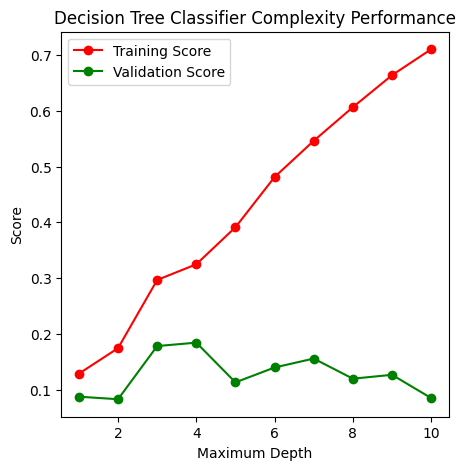

In [46]:
ModelComplexity(X_train, y_train)

## GridSearch

In [47]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def fit_model(X , y):
    
    cv_sets = ShuffleSplit(n_splits = 5 , random_state = 0 , test_size = 0.2 , train_size = None)
    
    Classifier = DecisionTreeClassifier(random_state=0)

    params = {"max_depth" : [2,4,6,8,10,12,14] , 'min_samples_leaf':[1,2,4,6,8,10],'min_samples_split':[2,4,6,8,10]}
    
    scoring = make_scorer(performance)
    
    grid = GridSearchCV(estimator=Classifier, param_grid= params, scoring=scoring,cv=cv_sets)
    
    grid = grid.fit(X, y)
    
    return grid.best_estimator_

In [48]:
clas = fit_model(X_train , y_train)
print("Parameter 'max_depth' is {} for the optimal model.".format(clas.get_params()['max_depth']))

Parameter 'max_depth' is 10 for the optimal model.


In [49]:
clas.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [50]:
clas.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=8,
                       random_state=0)

In [51]:
train_predict = clas.predict(X_train)
test_predict = clas.predict(X_test)

train_score = performance(y_train , train_predict)
test_score = performance(y_test , test_predict)

print("The Train Score Is : " , train_score)
print("The Test Score Is : " , test_score)

The Train Score Is :  0.8842257597684515
The Test Score Is :  0.8208092485549133


# Submission File

In [88]:
test_titanic = pd.read_csv("/kaggle/input/titanic/test.csv")
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [89]:
test_titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [90]:
test_titanic["Age"] = test_titanic["Age"].fillna(test_titanic["Age"].mean())
test_titanic["Fare"] = test_titanic["Fare"].fillna(test_titanic["Fare"].median())
test_titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [92]:
passid = test_titanic[["PassengerId"]]
passid

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [93]:
test_titanic = test_titanic.drop(["PassengerId" , "Name" , "Ticket" , "Embarked" , "Cabin"] , axis = 1)

In [94]:
test_titanic["Fare"] = np.log1p(test_titanic["Fare"])

In [95]:
test_titanic[["Age" , "Fare"]] = scaler_features.fit_transform(test_titanic[["Age" , "Fare"]])

In [96]:
test_titanic["Sex"] = le.fit_transform(test_titanic["Sex"])
test_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,0.334993,0,0,-0.867031
1,3,0,1.325530,1,0,-0.969149
2,2,1,2.514175,0,0,-0.669252
3,3,1,-0.259330,0,0,-0.773647
4,3,0,-0.655545,1,1,-0.443786


In [99]:
prediction = clas.predict(test_titanic)
prediction = pd.Series(prediction)
prediction = pd.DataFrame({"Survived" : prediction})
prediction

,Survived
0,0
1,1
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [100]:
df = pd.concat([passid, prediction], axis=1)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [103]:
df.to_csv('submission.csv', index=False)